In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle
import sys
import numpy as np

sys.path.append("../..")
import seaborn as sns

# sns.set_theme()
import matplotlib as mpl
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

from plot_config import FIGSIZE

from xlstm_scaling_laws.load_data import create_token_param_ratio_data_table

from xlstm_scaling_laws.analysis.tokenparam.plot_tokenparam_ratio_data import (
    create_num_token_training_plot,
    create_token_param_ratio_plot,
    create_training_flop_plot,
)

In [3]:
mlstm_scl_df = create_token_param_ratio_data_table(model_data="mlstm")
llama_scl_df_chinchilla = create_token_param_ratio_data_table(model_data="llama", attention_flop_calc_mode="chinchilla")
combined_scl_df_chinchilla = create_token_param_ratio_data_table(model_data="combined", attention_flop_calc_mode="chinchilla")
combined_scl_df_distill_scaling = create_token_param_ratio_data_table(model_data="combined", attention_flop_calc_mode="distill_scaling")

Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx8192_gbs512, id=hphy3hsq, path=['xlstm', 'xlstm_jax', 'hphy3hsq'], created_at=2024-11-06T22:21:03Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'chunkwise--triton_xl_chunk'}' from run WandBRunData(name=dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_gbs128, id=djkqz1dc, path=['xlstm', 'xlstm_jax', 'djkqz1dc'], created_at=2024-12-19T15:53:36Z).Using default chunk size of 64.
Could not extract chunk size from backend kwargs '{'backend_name': 'max_triton_noslice'}' from run WandBRunData(name=dclm_mLSTMv1_7B_ctx81

In [4]:
combined_scl_df_distill_scaling

,level_0,index,name,run_tag,model_type,global_batch_size,learning_rate,context_length,num_params,num_params_calculated,...,num_heads,proj_factor_qk,chunk_size,vocab_size,ffn_multiple_of,status,Preset Token Param Ratio,Model Size,Model Type,head_dim
0,0,6,dclm_mLSTMv1_160M_ctx8192_lr0.003_steps3500_nh...,scl_mlstm_160Mv2,mlstm_v1,128,0.0030,8192,1.641102e+08,1.641102e+08,...,6.0,0.5,64.0,50304,64,finished,22,160M,mLSTM,NaN
1,1,7,dclm_mLSTMv1_160M_ctx8192_lr0.003_steps5000_nh...,scl_mlstm_160Mv2,mlstm_v1,128,0.0030,8192,1.641102e+08,1.641102e+08,...,6.0,0.5,64.0,50304,64,finished,extra,160M,mLSTM,NaN
2,2,8,dclm_mLSTMv1_160M_ctx8192_lr0.003_steps7000_nh...,scl_mlstm_160Mv2,mlstm_v1,128,0.0030,8192,1.641102e+08,1.641102e+08,...,6.0,0.5,64.0,50304,64,finished,44,160M,mLSTM,NaN
3,3,9,dclm_mLSTMv1_160M_ctx8192_lr0.003_steps8000_nh...,scl_mlstm_160Mv2,mlstm_v1,128,0.0030,8192,1.641102e+08,1.641102e+08,...,6.0,0.5,64.0,50304,64,finished,extra,160M,mLSTM,NaN
4,4,10,dclm_mLSTMv1_160M_ctx8192_lr0.003_steps18000_n...,scl_mlstm_160Mv2,mlstm_v1,128,0.0030,8192,1.641102e+08,1.641102e+08,...,6.0,0.5,64.0,50304,64,finished,110,160M,mLSTM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,26,38,dclm_llama_2.7B_ctx8192_lr0.0007_steps76000_gb...,scl_llama_2.7B,llama,512,0.0007,8192,2.779548e+09,2.779548e+09,...,NaN,NaN,NaN,50304,64,finished,110,2.7B,Llama,80.0
62,27,39,dclm_llama_2.7B_ctx8192_lr0.0007_steps146000_g...,scl_llama_2.7B,llama,512,0.0007,8192,2.779548e+09,2.779548e+09,...,NaN,NaN,NaN,50304,64,finished,220,2.7B,Llama,80.0
63,28,40,dclm_llama_7B_ctx8192_lr0.0005_steps76000_gbs256,scl_llama_7B,llama,256,0.0005,8192,6.863196e+09,6.863196e+09,...,NaN,NaN,NaN,50304,64,finished,22,7B,Llama,128.0
64,29,41,dclm_llama_7B_ctx8192_lr0.0005_steps145000_gbs256,scl_llama_7B,llama,256,0.0005,8192,6.863196e+09,6.863196e+09,...,NaN,NaN,NaN,50304,64,finished,44,7B,Llama,128.0


In [5]:
sns.axes_style("whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [6]:
sns.set_style("whitegrid")

In [7]:
llama_scl_df_chinchilla

,index,name,run_tag,model_type,global_batch_size,learning_rate,context_length,num_params,num_params_calculated,num_train_steps,...,vocab_size,head_dim,ffn_multiple_of,proj_factor_ffn,status,val/.spaj627B_AR_loss,val/.spaj627B_AR_perplexity,Preset Token Param Ratio,Model Size,Model Type
0,0,dclm_llama_160M_ctx8192_lr0.003_steps3500_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,3500,...,50304,64,64,2.667,finished,NaN,NaN,22,160M,Llama
1,1,dclm_llama_160M_ctx8192_lr0.003_steps5000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,5000,...,50304,64,64,2.667,finished,3.241525,25.572688,extra,160M,Llama
2,2,dclm_llama_160M_ctx8192_lr0.003_steps7000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,7000,...,50304,64,64,2.667,finished,NaN,NaN,44,160M,Llama
3,3,dclm_llama_160M_ctx8192_lr0.003_steps8000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,8000,...,50304,64,64,2.667,finished,3.158687,23.539676,44,160M,Llama
4,4,dclm_llama_160M_ctx8192_lr0.003_steps18000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,18000,...,50304,64,64,2.667,finished,3.060652,21.341469,110,160M,Llama
5,5,dclm_llama_160M_ctx8192_lr0.003_steps36000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,36000,...,50304,64,64,2.667,finished,3.001501,20.115705,220,160M,Llama
6,6,dclm_llama_160M_ctx8192_lr0.003_steps87000_gbs128,scl_llama_160M,llama,128,0.0030,8192,1.622208e+08,1.622208e+08,87000,...,50304,64,64,2.667,finished,NaN,NaN,550,160M,Llama
7,7,dclm_llama_160M_ctx8192_lr0.001_steps173000_gb...,scl_llama_160M,llama,128,0.0010,8192,1.622208e+08,1.622208e+08,173000,...,50304,64,64,2.667,finished,2.942572,18.964564,1100,160M,Llama
8,8,dclm_llama_400M_ctx8192_lr0.003_steps10000_gbs128,scl_llama_400M,llama,128,0.0030,8192,4.066355e+08,4.066355e+08,10000,...,50304,64,64,2.667,finished,2.973153,19.553477,22,400M,Llama
9,9,dclm_llama_400M_ctx8192_lr0.003_steps18000_gbs128,scl_llama_400M,llama,128,0.0030,8192,4.066355e+08,4.066355e+08,18000,...,50304,64,64,2.667,finished,2.854381,17.363683,44,400M,Llama


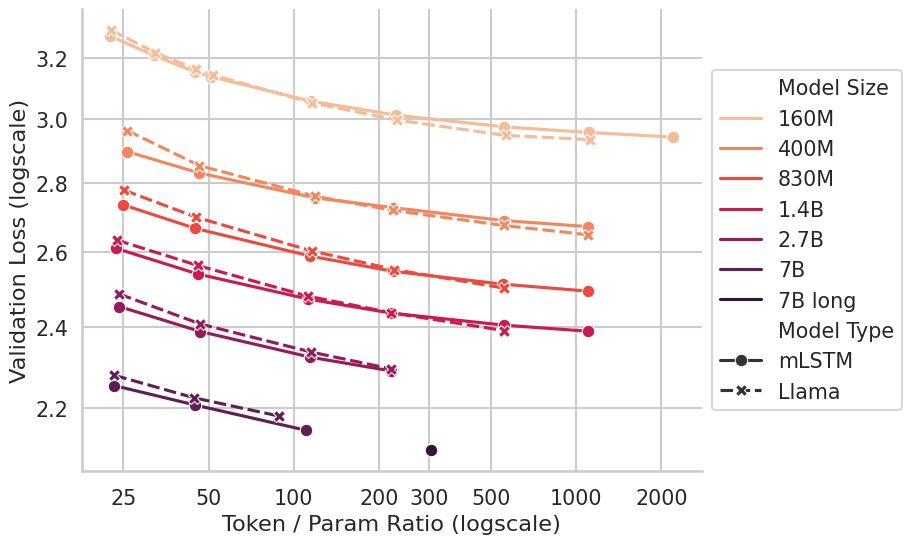

In [7]:
fig = create_token_param_ratio_plot(
    data_df=combined_scl_df_distill_scaling, context="talk", fontscale=0.9, figsize=(8, 6), y_axis_log=True
)

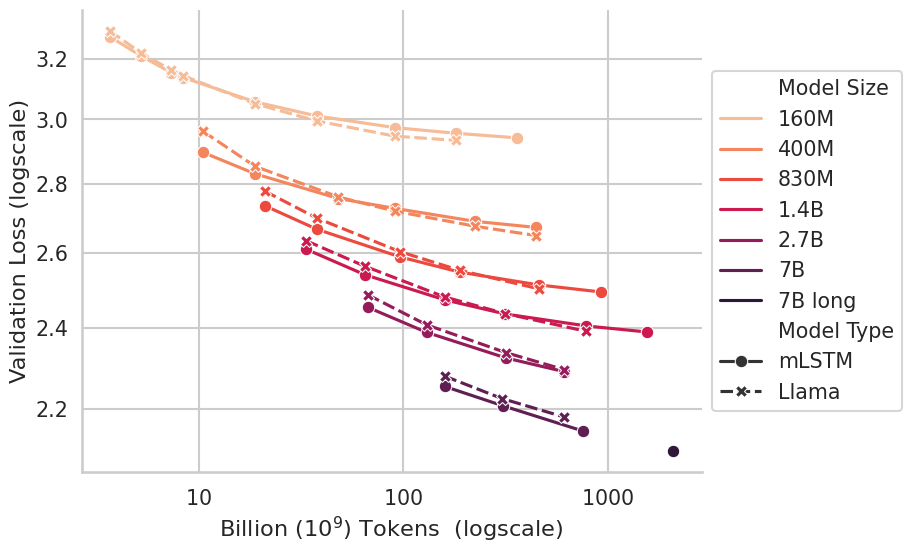

In [8]:
fig = create_num_token_training_plot(
    data_df=combined_scl_df_distill_scaling, figsize=(8, 6), context="talk", fontscale=0.9
)

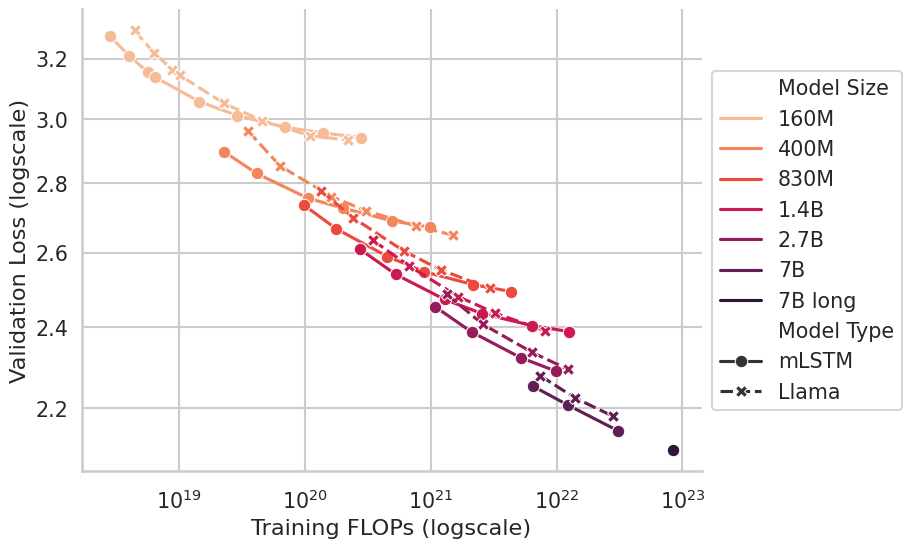

In [9]:
fig = create_training_flop_plot(
    data_df=combined_scl_df_distill_scaling, context="talk", fontscale=0.9, figsize=(8, 6), y_axis_log=True
)

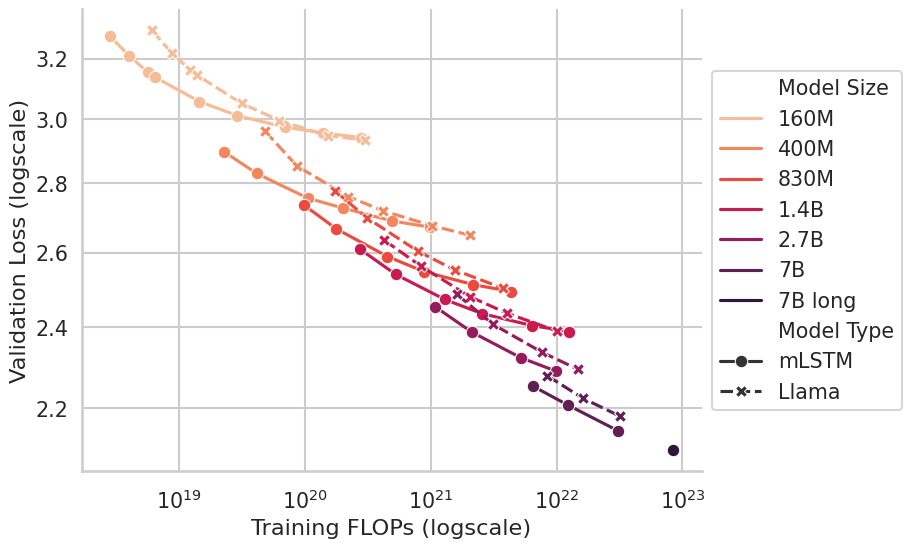

In [10]:
fig = create_training_flop_plot(
    data_df=combined_scl_df_chinchilla, context="talk", fontscale=0.9, figsize=(8, 6), y_axis_log=True
)

In [ ]:
# np.array((225, 227, 226)) / 255

array([0.88235294, 0.89019608, 0.88627451])